# Statistical Foundations (Self-Paced)

# Module 15 – Exploratory Data Analysis
<h2> Case Study: EDA On Import/Export HS Data </h2>

This assignment involves Exploratory Data Analysis (EDA) on international trade data classified using the Harmonized System (HS). The primary focus is to analyze and visualize trade patterns, with a special emphasis on India’s imports and exports.

### Case Study Overview
The goal is to examine and uncover trends in import and export activities by analyzing trade data from various countries.

### Data Details:
- HS Code: A standardized code to classify goods in international trade.
- Commodity: Name of the item.
- Country: Import/export partner.
- Year: Year of transaction.
- Value: Monetary value in million USD.

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Load data from the csv files
data_export = pd.read_csv('2018-2010_export.csv')
data_import = pd.read_csv('2018-2010_import.csv')
data_export.info()
data_import.info()
print(data_export.isnull().sum())
print(data_import.isnull().sum())
data_export.info()

print('Data export: ', data_export.head())
print('\nData import: ', data_import.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     137023 non-null  int64  
 1   Commodity  137023 non-null  object 
 2   value      122985 non-null  float64
 3   country    137023 non-null  object 
 4   year       137023 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     93095 non-null  int64  
 1   Commodity  93095 non-null  object 
 2   value      79068 non-null  float64
 3   country    93095 non-null  object 
 4   year       93095 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB
HSCode           0
Commodity        0
value        14038
country          0
year           

In [9]:

# Task 1: Data Cleaning

def cleanup(data_df):
    # Replace 'UNSPECIFIED' with NaN
    data_df['country'] = data_df['country'].apply(lambda x: np.nan if x == "UNSPECIFIED" else x)
    
    # Remove rows where value is 0
    data_df = data_df[data_df['value'] != 0]
    
    # Drop rows with any NaN values
    data_df.dropna(inplace=True)
    
    # Convert year to categorical
    data_df['year'] = pd.Categorical(data_df['year'])
    
    # Remove duplicate rows
    data_df.drop_duplicates(keep="first", inplace=True)
    
    return data_df

data_export = cleanup(data_export)
data_import = cleanup(data_import)
print('Data export: ', data_export.head())
print('\nData import: ', data_import.head())


Data export:     HSCode                                          Commodity  value  \
0       2                        MEAT AND EDIBLE MEAT OFFAL.   0.18   
2       4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...  12.48   
4       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   1.89   
5       8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...  25.01   
6       9                      COFFEE, TEA, MATE AND SPICES.  13.75   

           country  year  
0  AFGHANISTAN TIS  2018  
2  AFGHANISTAN TIS  2018  
4  AFGHANISTAN TIS  2018  
5  AFGHANISTAN TIS  2018  
6  AFGHANISTAN TIS  2018  

Data import:     HSCode                                          Commodity   value  \
1       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   12.38   
2       8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...  268.60   
3       9                      COFFEE, TEA, MATE AND SPICES.   35.48   
5      12  OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...    8.32   
6      13  LAC; GUMS, 

,HSCode,Commodity,value,country,year
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
5,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",8.32,AFGHANISTAN TIS,2018
6,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",108.78,AFGHANISTAN TIS,2018


In [13]:
data_export['cat'] = 'E'
data_import['cat'] = 'I'

df = pd.concat([data_export,data_import],ignore_index=True)

print(df.head())
print(df.tail())

   HSCode                                          Commodity  value  \
0       2                        MEAT AND EDIBLE MEAT OFFAL.   0.18   
1       3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.00   
2       4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...  12.48   
3       6  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...   0.00   
4       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   1.89   

           country  year cat  
0  AFGHANISTAN TIS  2018   E  
1  AFGHANISTAN TIS  2018   E  
2  AFGHANISTAN TIS  2018   E  
3  AFGHANISTAN TIS  2018   E  
4  AFGHANISTAN TIS  2018   E  
        HSCode                                          Commodity  value  \
230113      81      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.   0.14   
230114      82  TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...   0.00   
230115      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...    NaN   
230116      85  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...    NaN   
230117 

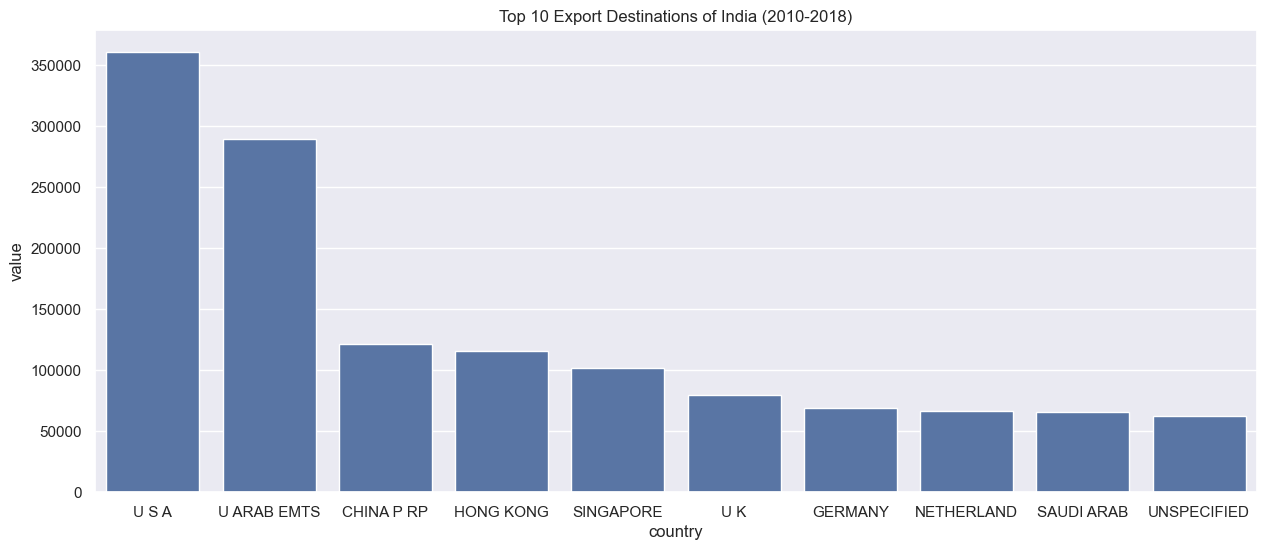

In [19]:
# Task 2: Top 10 Export Destinations of India (2010-2018)
 # Group data by country and sum up export values.
 # Sort and pick the top 10.
 # Plot a horizontal bar chart

df_q1 = data_export.groupby('country').agg({'value':'sum'})
df_q1 = df_q1.sort_values(by='value', ascending = False)
df_q1 = df_q1[:10]

sns.set(rc={'figure.figsize': (15, 6)})
sns.barplot(y='value', x=df_q1.index, data=df_q1.reset_index()).set_title('Top 10 Export Destinations of India (2010-2018)');


In [20]:
# Task 3: Skewness Analysis for 2018
 # Skewness: Measures asymmetry in data distribution

from scipy.stats import skew

# Conditions for import/export in 2018
imports_2018 = df[(df['year'] == 2018) & (df['cat'] == 'I')].groupby('country')['value'].sum()
exports_2018 = df[(df['year'] == 2018) & (df['cat'] == 'E')].groupby('country')['value'].sum()

# Calculate skewness
skew_import = skew(imports_2018)
skew_export = skew(exports_2018)

print(f"Import Skewness: {skew_import}, Export Skewness: {skew_export}")




Import Skewness: 5.983923321211679, Export Skewness: 7.872378364531886


Text(0, 0.5, 'Value (in Million USD)')

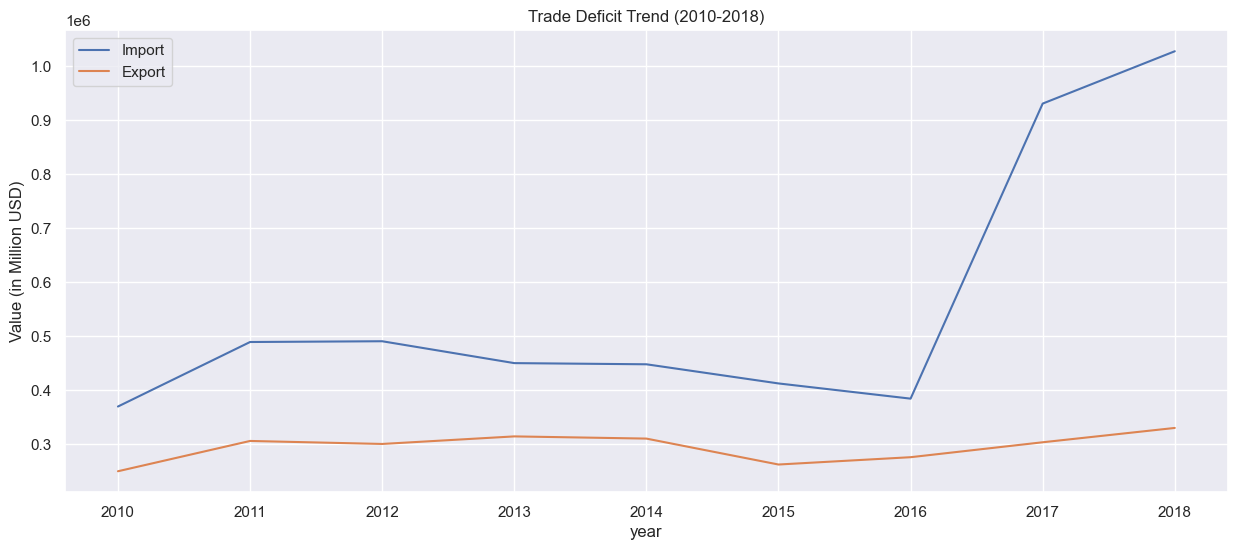

In [21]:
# Task 4: Trade Deficit Trend
 # Compare total yearly import/export values

df[df['cat'] == 'I'].groupby('year')['value'].sum().plot(label='Import', legend=True)
df[df['cat'] == 'E'].groupby('year')['value'].sum().plot(label='Export', legend=True)
plt.title('Trade Deficit Trend (2010-2018)')
plt.ylabel('Value (in Million USD)')


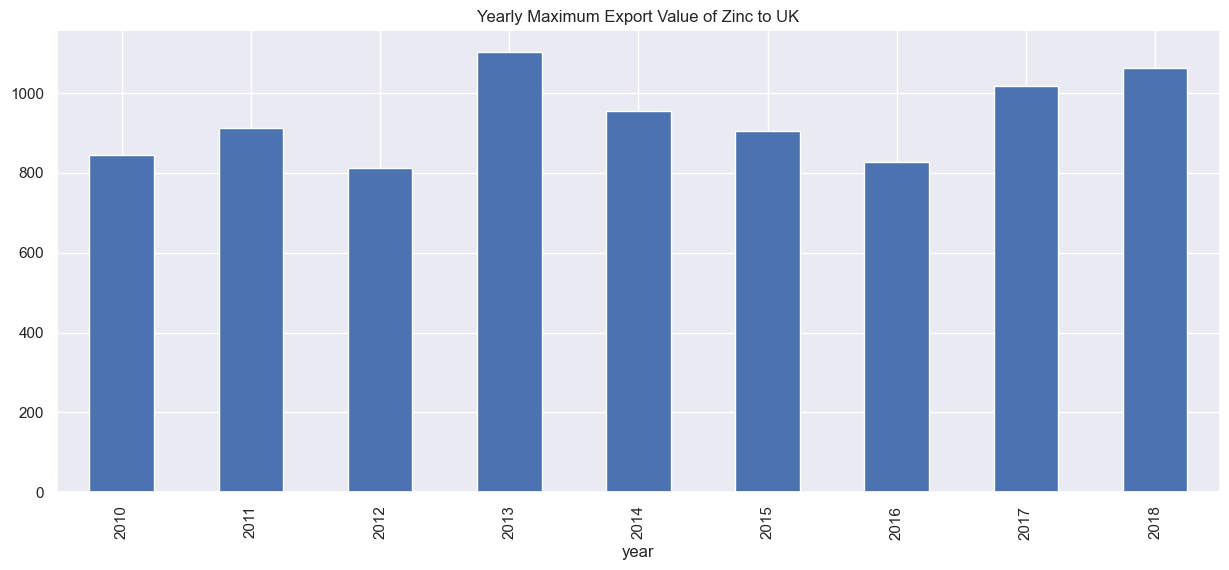

In [22]:
# Task 5: Zinc Export to the UK
 # Filter data for the UK and ZINC AND ARTICLES THEREOF.
 # Find the maximum export values by year and plot a bar chart

zinc_uk = df[(df['country'] == 'U K') & (df['cat'] == 'E')].groupby('year').max()['value']
zinc_uk.plot(kind='bar', title='Yearly Maximum Export Value of Zinc to UK');


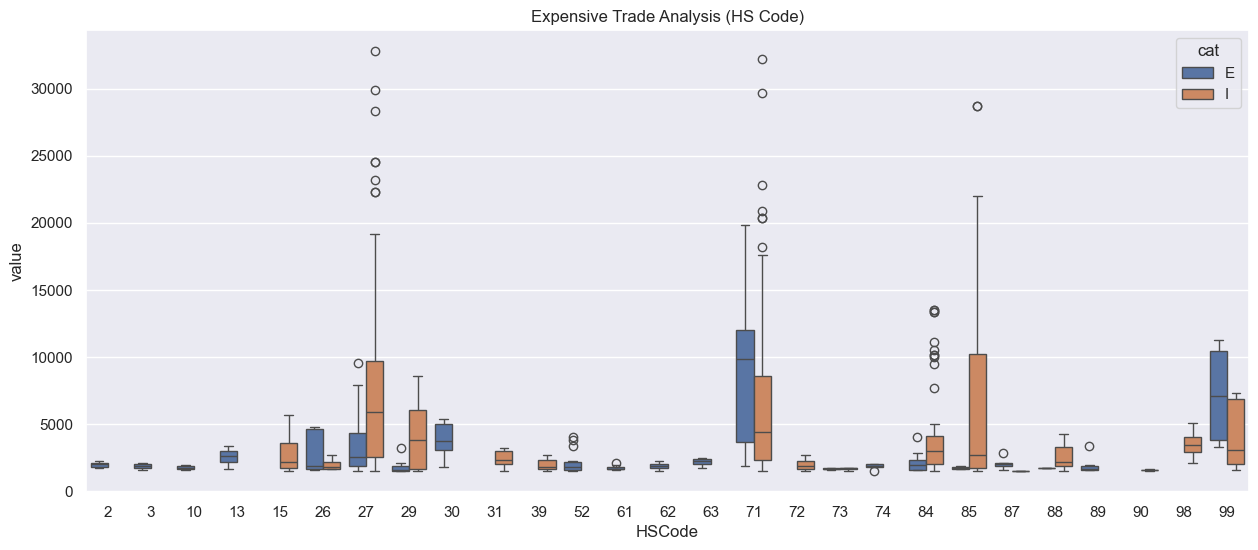

In [23]:
# Task 6: Expensive Trade Analysis
 # Define "expensive" transactions as those with value > 1500.
 # Create boxplots for import/export values grouped by HSCode

expensive_trades = df[df['value'] > 1500]
sns.boxplot(x='HSCode', y='value', hue='cat', data=expensive_trades).set_title('Expensive Trade Analysis (HS Code)');


Text(0.5, 1.0, 'Australia Import Values (2010-2018)')

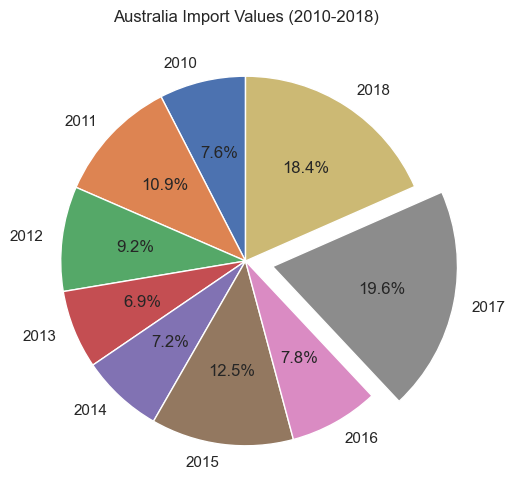

In [25]:
# Task 7: Australia’s Imports Analysis (2010-2018)
 # Summarize yearly import values for Australia.
 # Create a pie chart with an exploded slice for the maximum value.

aus_imports = df[(df['country'] == 'AUSTRALIA') & (df['cat'] == 'I')].groupby('year')['value'].sum()
max_idx = aus_imports.idxmax()
explode = [0.15 if i == max_idx else 0 for i in aus_imports.index]
plt.pie(aus_imports, labels=aus_imports.index, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Australia Import Values (2010-2018)')

